# The Spark Foundataionn: Data Science and business analytics Intership

### Task 1 : Prediction using Supervised Machine Learning Problem

### Statement : Predict the percentage of an student based on the number of study hours.

### Author : Shivthare Ankita Pradip

## Step 1 : Processing the Dataset

In [1]:
# Loading required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data=pd.read_excel("C:/Users/ankit/Downloads/Data I (1).xlsx")
data.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape  # used to find number of rows and columns in the dataset

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Descriptive statistics about the data
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()  # To check the null value and adding them

hours     0
scores    0
dtype: int64

## Step 2 : Visualization of data

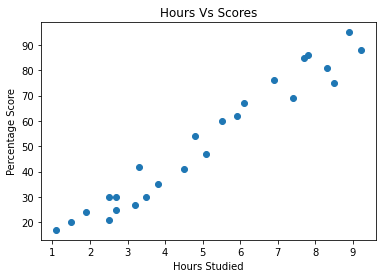

In [7]:
plt.scatter(x=data["hours"],y=data["scores"])
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### The above scatter plot shows the relationship between students study hours and their respective scores.

#### From above graph we conclude that as study hours increasing then marks also increasing.

## Step 3 : Prepare the data set for machine learning algorithm

In [8]:
# Data Cleaning
data.mean()

hours      5.012
scores    51.480
dtype: float64

In [9]:
data1=data.fillna(data.mean())  # if there is missing value then it is filled with mean/median/mode
data1.isnull().sum()

hours     0
scores    0
dtype: int64

In [10]:
# split the dataset for training
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25,)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [12]:
print("shape of x train",x_train.shape)
print("shape of x test",x_test.shape)
print("shape of y train",y_train.shape)
print("shape of y test",y_test.shape)

shape of x train (20, 1)
shape of x test (5, 1)
shape of y train (20,)
shape of y test (5,)


## Step 4 : Select the model and train it

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

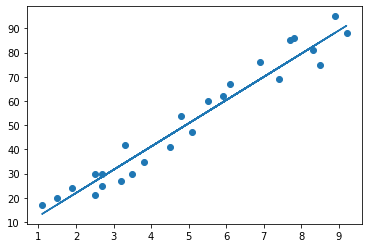

In [15]:
m=lr.coef_
c=lr.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [16]:
y_pred=lr.predict(x_test)
actual_predicted=pd.DataFrame({'Target':y_test,'predicted':y_pred})
actual_predicted

,Target,predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


In [17]:
lr.score(x_test,y_test)

0.971014141329942

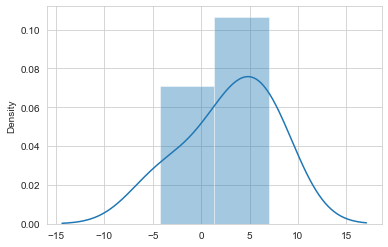

In [18]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [19]:
h=9.25
s=lr.predict([[h]])
print("If student studies for {} hours per day he/she will score {}% in exam.".format(h,s))

If student studies for 9.25 hours per day he/she will score [91.56986604]% in exam.


#### If student will studied 9.25 Hours per day then the predicted score of student is 91.56%

# Thank You !